In [ ]:
import cv2
import matplotlib.pyplot as plt
from scipy.i

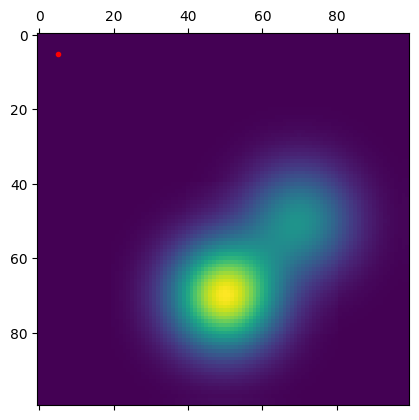

In [3]:
from ex2_utils import *
response = generate_responses_1()
plt.matshow(response)
plt.plot(5, 5, "ro", markersize=3)

In [153]:
def mean_shift(fun, h):
    width, height = fun.shape
    
    img = np.pad(fun, h, "constant", constant_values=(0))
    patch = np.zeros((1))
    h_side = int((h-1)/2)

    past_coordinates = []
    
    while np.sum(patch) == 0:
        x = np.random.randint(0, width) + h
        y = np.random.randint(0, height) + h

        x_min = x - h_side
        x_max = x + h_side
        y_min = y - h_side
        y_max = y + h_side

        patch = img[y_min:y_max+1, x_min:x_max+1]

    plt.matshow(img)
    plt.plot(x, y, "ro", markersize=2)

    x_new = None
    y_new = None
    while True:
    
        x_min = x - h_side
        x_max = x + h_side
        y_min = y - h_side
        y_max = y + h_side

        patch = img[y_min:y_max+1, x_min:x_max+1]
    
        rows = []
        for _ in range(h):
            rows.append([x for x in range(-h_side, h_side+1)])

        x_diffs = np.array(rows)
        y_diffs = x_diffs.T

        x_diffs = (x_diffs/h)**2
        y_diffs = (y_diffs/h)**2

        #need kernel

        x_coords = np.tile(np.arange(x_min, x_max+1), (h, 1))
        y_coords = np.tile(np.arange(y_min, y_max+1), (h, 1)).T

        x_new = int(np.sum(x_coords * x_diffs * -patch) / np.sum(x_diffs * -patch))
        y_new = int(np.sum(y_coords * y_diffs * -patch) / np.sum(y_diffs * -patch))

        plt.plot(x_new, y_new, "ro", markersize=2)
        
        if (x_new == x) and (y_new == y):
            print("here")
            plt.plot(x_new, y_new, "gx")
            return x_new, y_new
        
        past_coordinates.append([x,y])
            
        x = x_new
        y = y_new
    
            
    

here


(76, 57)

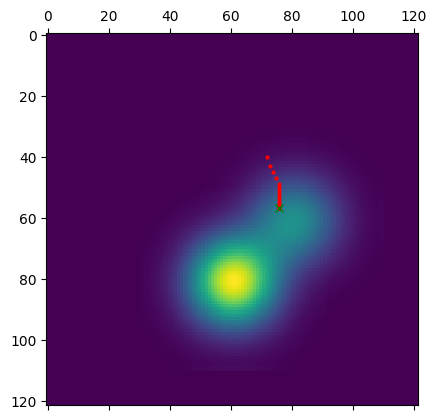

In [221]:
mean_shift(response, 11)

In [ ]:
from ex2_utils import *
response = generate_responses_1()
plt.matshow(response)
plt.plot(5, 5, "ro", markersize=3)

array([[1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5]])